In [260]:
import numpy as np
import pandas as pd
df = pd.read_csv("NIFTY50_all.csv",parse_dates=['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [198]:
#Checking Null Values
df.isnull().sum().sort_values(ascending=False)

Trades                114848
%Deliverble            16077
Deliverable Volume     16077
Turnover                   0
Volume                     0
VWAP                       0
Close                      0
Last                       0
Low                        0
High                       0
Open                       0
Prev Close                 0
Series                     0
Symbol                     0
Date                       0
dtype: int64

In [261]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFRATEL', 'INFOSYSTCH',
       'INFY', 'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO',
       'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN',
       'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO',
       'ZEETELE', 'ZEEL'], dtype=object)

In [262]:
company="BRITANNIA"
df1=df.loc[df['Symbol']==company]
df1=df1[['Date','Open','High','Low','Close','Volume']]
df1.head()

,Date,Open,High,Low,Close,Volume
34836,2000-01-03,705.0,759.50,705.0,756.90,7512
34837,2000-01-04,710.0,770.00,710.0,754.55,8135
34838,2000-01-05,755.0,759.00,705.0,735.30,6095
34839,2000-01-06,740.0,794.15,740.0,785.65,19697
34840,2000-01-07,808.0,848.50,798.0,848.50,33107


In [263]:
df1.reset_index()
df1.set_index('Date',inplace=True)

In [233]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-26,435.80,440.50,431.65,438.60,1534637
2003-12-29,441.00,449.70,441.00,447.80,2125952
2003-12-30,450.00,451.90,430.10,442.40,2683293
2003-12-31,446.00,459.30,443.55,452.05,4311596
2004-01-01,453.25,457.90,451.50,454.45,2077604
...,...,...,...,...,...
2020-11-23,169.50,173.90,165.55,170.70,54566251
2020-11-24,171.85,175.50,171.10,172.05,47695247
2020-11-25,175.00,176.80,169.25,171.45,54366608


In [264]:
df1.shape

(5203, 5)

Text(0, 0.5, 'Closing Price')

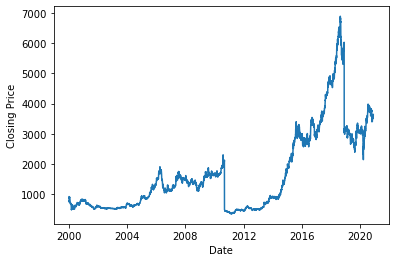

In [265]:
#plotting closing price for the company
import matplotlib.pyplot as plt
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')


In [266]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1)

In [516]:
df1.shape

(5204, 5)

In [6]:
#normalised closing price
df1

array([[1.60159744e-03, 8.69421214e-04, 3.75516335e-03, 2.74725275e-03,
        3.20363317e-04],
       [8.25758679e-03, 6.43785708e-03, 5.84136521e-03, 4.32900433e-03,
        1.66727742e-03],
       [3.26559478e-03, 2.48406061e-03, 3.33792298e-03, 1.47768898e-03,
        1.57887596e-03],
       ...,
       [5.36285542e-01, 5.36764097e-01, 5.17378062e-01, 5.15900766e-01,
        1.20075427e-01],
       [5.21184766e-01, 5.23350170e-01, 5.13205658e-01, 5.25828338e-01,
        1.38921763e-01],
       [5.28173555e-01, 5.29146311e-01, 5.25117870e-01, 5.31739094e-01,
        8.94579835e-02]])

In [267]:
#Spliting train and test data
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [76]:
len(df1)

5204

In [77]:
train_data.shape

(3903, 5)

In [78]:
test_data.shape

(1301, 5)

In [268]:
def create_dataset(dataset,time_step=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i+time_step,:])
    return np.array(dataX), np.array(dataY)

In [269]:
time_step = 100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [81]:
print(X_train)

[[[0.0043234  0.00248886 0.00318744 0.00425667 0.00097211]
  [0.00355872 0.00465937 0.00295133 0.00327214 0.00100699]
  [0.00176465 0.00176535 0.0008854  0.00121619 0.0007677 ]
  ...
  [0.08346813 0.08169821 0.08278488 0.08125326 0.00017438]
  [0.08137996 0.08071424 0.08086651 0.0812243  0.00017727]
  [0.08352696 0.08192973 0.08210607 0.08244049 0.00019385]]

 [[0.00355872 0.00465937 0.00295133 0.00327214 0.00100699]
  [0.00176465 0.00176535 0.0008854  0.00121619 0.0007677 ]
  [0.00235287 0.00205475 0.00209545 0.00153472 0.00093338]
  ...
  [0.08137996 0.08071424 0.08086651 0.0812243  0.00017727]
  [0.08352696 0.08192973 0.08210607 0.08244049 0.00019385]
  [0.08376224 0.08192973 0.08337514 0.08284589 0.00018347]]

 [[0.00176465 0.00176535 0.0008854  0.00121619 0.0007677 ]
  [0.00235287 0.00205475 0.00209545 0.00153472 0.00093338]
  [0.00117644 0.00118655 0.         0.         0.00045808]
  ...
  [0.08352696 0.08192973 0.08210607 0.08244049 0.00019385]
  [0.08376224 0.08192973 0.0833751

In [46]:
print(Y_train)

[[0.04373484 0.04104272 0.04753494 0.04659255 0.08649731]
 [0.04704931 0.04459964 0.04923323 0.04662569 0.12886611]
 [0.04417138 0.04105896 0.04721227 0.04506818 0.08175395]
 ...
 [0.2439612  0.24052298 0.24339792 0.23630971 0.06585204]
 [0.22780922 0.22491473 0.23770868 0.23354266 0.06950791]
 [0.21810833 0.21455254 0.2108758  0.20756218 0.12416603]]


In [83]:
print(X_train.shape),print(Y_train.shape)

(3802, 100, 5)
(3802, 5)


(None, None)

In [46]:
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_test.shape),print(Y_test.shape)

(1200, 100, 5)
(1200, 5)


(None, None)

In [270]:
#lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [271]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],5)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(5))

model.compile(loss='mean_squared_error',optimizer='adam')

In [147]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           11200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [272]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=250,batch_size=64,verbose=1)

Epoch 1/250
60/60 [==============================] - 6s 43ms/step - loss: 0.0032 - val_loss: 0.0052
Epoch 2/250
60/60 [==============================] - 2s 28ms/step - loss: 5.4227e-04 - val_loss: 0.0030
Epoch 3/250
60/60 [==============================] - 2s 29ms/step - loss: 4.1026e-04 - val_loss: 0.0028
Epoch 4/250
60/60 [==============================] - 2s 30ms/step - loss: 3.9904e-04 - val_loss: 0.0028
Epoch 5/250
60/60 [==============================] - 2s 29ms/step - loss: 3.5060e-04 - val_loss: 0.0031
Epoch 6/250
60/60 [==============================] - 2s 29ms/step - loss: 3.1779e-04 - val_loss: 0.0025
Epoch 7/250
60/60 [==============================] - 2s 30ms/step - loss: 2.9630e-04 - val_loss: 0.0028
Epoch 8/250
60/60 [==============================] - 2s 29ms/step - loss: 3.1307e-04 - val_loss: 0.0023
Epoch 9/250
60/60 [==============================] - 2s 30ms/step - loss: 2.2620e-04 - val_loss: 0.0022
Epoch 10/250
60/60 [==============================] - 2s 28ms/step -

60/60 [==============================] - 2s 27ms/step - loss: 1.1704e-04 - val_loss: 0.0025
Epoch 80/250
60/60 [==============================] - 2s 28ms/step - loss: 1.1022e-04 - val_loss: 0.0023
Epoch 81/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0627e-04 - val_loss: 0.0014
Epoch 82/250
60/60 [==============================] - 2s 27ms/step - loss: 1.1999e-04 - val_loss: 0.0017
Epoch 83/250
60/60 [==============================] - 2s 28ms/step - loss: 1.1444e-04 - val_loss: 0.0014
Epoch 84/250
60/60 [==============================] - 2s 28ms/step - loss: 1.0465e-04 - val_loss: 0.0017
Epoch 85/250
60/60 [==============================] - 2s 27ms/step - loss: 1.3532e-04 - val_loss: 0.0013
Epoch 86/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0986e-04 - val_loss: 0.0014
Epoch 87/250
60/60 [==============================] - 2s 28ms/step - loss: 1.2707e-04 - val_loss: 0.0020
Epoch 88/250
60/60 [==============================] - 2s 27ms/step -

60/60 [==============================] - 2s 28ms/step - loss: 1.1275e-04 - val_loss: 0.0025
Epoch 157/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0908e-04 - val_loss: 0.0020
Epoch 158/250
60/60 [==============================] - 2s 28ms/step - loss: 1.0173e-04 - val_loss: 0.0021
Epoch 159/250
60/60 [==============================] - 2s 28ms/step - loss: 1.1146e-04 - val_loss: 0.0031
Epoch 160/250
60/60 [==============================] - 2s 28ms/step - loss: 1.0072e-04 - val_loss: 0.0028
Epoch 161/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0790e-04 - val_loss: 0.0028
Epoch 162/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0936e-04 - val_loss: 0.0020
Epoch 163/250
60/60 [==============================] - 2s 28ms/step - loss: 1.3379e-04 - val_loss: 0.0018
Epoch 164/250
60/60 [==============================] - 2s 28ms/step - loss: 8.5854e-05 - val_loss: 0.0032
Epoch 165/250
60/60 [==============================] - 2s 28

60/60 [==============================] - 2s 28ms/step - loss: 1.2455e-04 - val_loss: 0.0039
Epoch 234/250
60/60 [==============================] - 2s 27ms/step - loss: 1.2486e-04 - val_loss: 0.0042
Epoch 235/250
60/60 [==============================] - 2s 28ms/step - loss: 1.0364e-04 - val_loss: 0.0034
Epoch 236/250
60/60 [==============================] - 2s 28ms/step - loss: 9.9526e-05 - val_loss: 0.0044
Epoch 237/250
60/60 [==============================] - 2s 27ms/step - loss: 1.0879e-04 - val_loss: 0.0042
Epoch 238/250
60/60 [==============================] - 2s 27ms/step - loss: 1.1156e-04 - val_loss: 0.0045
Epoch 239/250
60/60 [==============================] - 2s 28ms/step - loss: 9.4387e-05 - val_loss: 0.0030
Epoch 240/250
60/60 [==============================] - 2s 28ms/step - loss: 9.1000e-05 - val_loss: 0.0026
Epoch 241/250
60/60 [==============================] - 2s 28ms/step - loss: 1.0594e-04 - val_loss: 0.0032
Epoch 242/250
60/60 [==============================] - 2s 28

In [273]:
x="BRITANNIA"+".h5"


In [274]:
from keras.models import load_model
 
model.save('BRITANNIA.h5')
model = load_model(x)


In [275]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [213]:
train_predict.shape

(1790, 5)

In [214]:
print(train_predict)

[[ 0.00656927  0.0063518   0.00757748  0.00824979 -0.00102957]
 [ 0.00714113  0.0069102   0.00814064  0.00881809 -0.00104377]
 [ 0.00780991  0.00756292  0.00879973  0.00948235 -0.00104828]
 ...
 [ 0.12733309  0.12376928  0.12647077  0.12757683  0.02513936]
 [ 0.1265659   0.1230262   0.12571155  0.12681796  0.02468298]
 [ 0.1255531   0.12204439  0.12471206  0.12581642  0.02429192]]


In [276]:
#train_predict_new = np.empty(shape=(len(train_predict), 5))
#train_predict_new[:,0] = train_predict[:,0]
train_predict = scaler.inverse_transform(train_predict)

#test_predict_new = np.empty(shape=(len(test_predict), 5))
#test_predict_new[:,0] = test_predict[:,0]
test_predict = scaler.inverse_transform(test_predict)


In [216]:
print(train_predict)

[[ 6.3055396e+02  6.4312744e+02  6.1751855e+02  6.3390118e+02
  -2.6624533e+04]
 [ 6.3669574e+02  6.4938049e+02  6.2357703e+02  6.4006659e+02
  -2.6993283e+04]
 [ 6.4387842e+02  6.5668958e+02  6.3066754e+02  6.4727313e+02
  -2.7110301e+04]
 ...
 [ 1.9275575e+03  1.9579683e+03  1.8965726e+03  1.9284681e+03
   6.5272075e+05]
 [ 1.9193179e+03  1.9496473e+03  1.8884048e+03  1.9202352e+03
   6.4087312e+05]
 [ 1.9084403e+03  1.9386531e+03  1.8776525e+03  1.9093698e+03
   6.3072131e+05]]


In [217]:
print(test_predict)

[[   2366.5525    2396.4426    2337.0825    2367.0564 1863487.4   ]
 [   2323.6975    2352.6687    2295.1162    2323.9258 1914849.1   ]
 [   2350.9934    2379.9119    2322.2598    2351.1619 1958063.9   ]
 ...
 [   5380.8896    5446.1143    5300.7295    5381.6245 1473007.2   ]
 [   5529.0464    5596.1675    5446.23      5529.7227 1439134.5   ]
 [   5543.1123    5610.6196    5460.0874    5543.7017 1420680.4   ]]


In [277]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train[:,3],train_predict[:,3]))

1105.5026039104473

In [278]:
math.sqrt(mean_squared_error(Y_test[:,3],test_predict[:,3]))

3553.648168665027

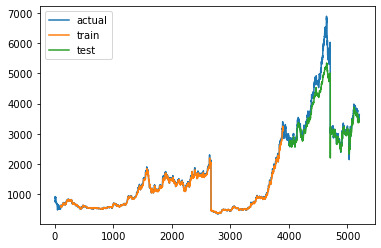

In [279]:
df2=scaler.inverse_transform(df1)
df2 = df2[:,3]
df2 = np.reshape(df2, (-1, 1))
train_predict=train_predict[:,3]
test_predict=test_predict[:,3]
train_predict=np.reshape(train_predict,(-1,1))
test_predict=np.reshape(test_predict,(-1,1))
plt.plot(df2)
look_back=100
trainPredictPlot=np.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot=np.empty_like(df2)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:] = test_predict
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
labels=['actual','train','test']

plt.legend(labels)
plt.show()


In [187]:
test_data.shape

(1301, 5)

In [280]:
x_input=test_data[-100:].reshape(1,-1,5)
x_input.shape


(1, 100, 5)

In [406]:
print(x_input)

[[[0.01640319 0.01620113 0.01653429 0.01617142 0.42412498]
  [0.01664114 0.01539924 0.0155679  0.01530536 0.23583926]
  [0.01470785 0.01317177 0.01345393 0.0133194  0.23694702]
  [0.01341404 0.01247383 0.01297074 0.01264745 0.22280303]
  [0.01253662 0.01158284 0.01256304 0.01337912 0.17720057]
  [0.01307199 0.01234018 0.01357473 0.01396148 0.17905166]
  [0.01402376 0.01345391 0.01470721 0.01472301 0.17389262]
  [0.01475246 0.01433005 0.0155377  0.01581305 0.22568881]
  [0.01571911 0.0144934  0.01511491 0.01509631 0.23707435]
  [0.01473759 0.01519134 0.01543201 0.01696282 0.269531  ]
  [0.01571911 0.01435975 0.01528101 0.01508138 0.24845524]
  [0.01491605 0.01343906 0.01402772 0.0136479  0.19305618]
  [0.01342891 0.01263717 0.01380123 0.01433478 0.19601062]
  [0.01330994 0.01404791 0.01417872 0.0148574  0.28081718]
  [0.01476734 0.01352816 0.01389182 0.01346872 0.18454511]
  [0.01342891 0.01392911 0.01408812 0.01493206 0.55544049]
  [0.01461862 0.01385486 0.01509981 0.01517097 0.2758331

In [281]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[[0.5061720887807843,
  0.517091389401289,
  0.5140595119712384,
  0.5165148237301563,
  0.13114650567668376],
 [0.5199148677409546,
  0.5294497202675108,
  0.528577985160254,
  0.5272022304153083,
  0.2059108540630783],
 [0.5253192459714199,
  0.5235210615411476,
  0.5253270098676662,
  0.5178250403729547,
  0.07413615459585425],
 [0.5171784737002129,
  0.5208413988901794,
  0.5226803335118183,
  0.5159968311039338,
  0.09407861412499867],
 [0.5152021891152325,
  0.5363196769222595,
  0.5192916698538974,
  0.5360309576769555,
  0.18335680237101362],
 [0.5411979325022803,
  0.5450874116584303,
  0.5311099212116577,
  0.5254044913007709,
  0.8364082694969935],
 [0.534965034965035,
  0.5534376352166883,
  0.5372905989443892,
  0.5555166214692709,
  0.7030634570459028],
 [0.5562480997263606,
  0.5560186134074226,
  0.5476631224661517,
  0.5399387549894878,
  0.34931178231134824],
 [0.5434478564913348,
  0.543022629105843,
  0.5348198577220226,
  0.5284591242877602,
  0.18931554181528687],

In [190]:
len(temp_input)

100

In [282]:
lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day".format(i+1))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, 5))

        yhat = model.predict(x_input, verbose=0)
        print("data: {}".format(yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,5))
        yhat= model.predict(x_input, verbose=0)
        print("{} day".format(i+1))
        print(yhat[:,3])
        temp_input.extend(yhat.tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

1 day
[0.478282]
2 day
data: [[0.4628084  0.4674885  0.46539998 0.46229362 0.10329313]]
3 day
data: [[0.4836931  0.48860413 0.4860325  0.48305136 0.09147833]]
4 day
data: [[0.47195292 0.4768422  0.4742732  0.4712856  0.09352125]]
5 day
data: [[0.46591452 0.47077    0.4681176  0.46518326 0.08239847]]
6 day
data: [[0.4572797  0.46209455 0.45946074 0.45653448 0.07920862]]
7 day
data: [[0.45024076 0.4550195  0.45240808 0.4494908  0.07559372]]
8 day
data: [[0.44425508 0.4490057  0.44642216 0.44350922 0.07313699]]
9 day
data: [[0.43941984 0.44414893 0.4415899  0.4386801  0.07109831]]
10 day
data: [[0.43517998 0.43988958 0.43735522 0.43444693 0.06948148]]
11 day
data: [[0.4312872  0.43597725 0.43346775 0.4305599  0.06801958]]
12 day
data: [[0.42755392 0.43222326 0.42973995 0.42683178 0.06666378]]
13 day
data: [[0.42389715 0.42854443 0.42608917 0.42317992 0.06537955]]
14 day
data: [[0.42028156 0.4249056  0.42248034 0.41956908 0.06416482]]
15 day
data: [[0.41669923 0.4212991  0.4189059  0.41599

In [283]:
lst_output=scaler.inverse_transform(lst_output)

In [284]:
lst_output

array([[   3486.73087001,    3531.12197431,    3446.10425137,
           3475.69742176, 1154043.48196444],
       [   3384.35365778,    3426.88311203,    3337.28697283,
           3370.75289497,  556182.07866693],
       [   3521.73316616,    3565.96438207,    3472.15134449,
           3507.00251449,  492574.8944491 ],
       [   3444.50627613,    3488.49264235,    3395.2868032 ,
           3429.77449605,  503573.33713652],
       [   3404.78569704,    3448.4972298 ,    3355.05065788,
           3389.71986923,  443691.75925595],
       [   3347.98594528,    3391.35503722,    3298.46509643,
           3332.95098758,  426518.57562096],
       [   3301.68372613,    3344.75421491,    3252.36538441,
           3286.71761851,  407057.06481535],
       [   3262.30994123,    3305.1433491 ,    3213.23844669,
           3247.4558253 ,  393830.82337499],
       [   3230.50367993,    3273.15353613,    3181.65232847,
           3215.75852152,  382855.16408137],
       [   3202.61389929,    3245.098

In [285]:
pred_closing=lst_output[:,3]

In [286]:
pred_closing

array([3475.69742176, 3370.75289497, 3507.00251449, 3429.77449605,
       3389.71986923, 3332.95098758, 3286.71761851, 3247.4558253 ,
       3215.75852152, 3187.97276495, 3162.45909383, 3137.9884498 ,
       3114.01838835, 3090.31749519, 3066.83784427, 3043.58413039,
       3020.5676993 , 2997.78992032, 2975.23729592, 2952.89143814,
       2930.73082917, 2908.73649421, 2886.89356641, 2865.19187371,
       2843.62456953, 2822.18754593, 2800.87884675, 2779.69729828,
       2758.64309614, 2737.71604471, 2716.91594839, 2696.24358962,
       2675.69799034, 2655.27934616, 2634.98765707, 2614.82253185,
       2594.78377488, 2574.86982122, 2555.08067088, 2535.41573701,
       2515.87423714, 2496.45460634, 2477.15645337, 2457.97860454,
       2438.91988615, 2419.97873327, 2401.15475466, 2382.44697224,
       2363.85362547, 2345.37432311, 2327.0073046 , 2308.75198311,
       2290.60698932, 2272.57154076, 2254.64505057, 2236.82614946,
       2219.11425056, 2201.50837579, 2184.0077427 , 2166.61176

In [287]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [288]:
import matplotlib.pyplot as plt

In [230]:
len(df2)

4205

In [375]:
print(df2)

[[0.03052113]
 [0.03513514]
 [0.03195461]
 ...
 [0.03032701]
 [0.03105868]
 [0.03070031]]


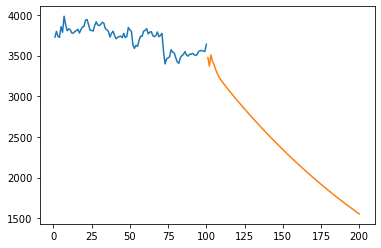

In [289]:
from PIL import Image
from io import BytesIO
import io
import urllib, base64
plt.plot(day_new,df2[-100:])
plt.plot(day_pred,pred_closing)
fig=plt.gcf()


In [32]:

def base64_convert(fig):
    img = io.BytesIO()
    fig.savefig(img, format='png',
                bbox_inches='tight')
    img.seek(0)

    return base64.b64encode(img.getvalue())

encoded = base64_convert(fig)
my_html = '<img src="data:image/png;base64, {}">'.format(encoded.decode('utf-8'))


In [60]:
encoded.decode('utf-8')

'iVBORw0KGgoAAAANSUhEUgAAAX0AAAD4CAYAAAAAczaOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deXyU9d3v/9csWUgySci+DCEkA4EEwhZR1KKiUNEKxQVBLVK0tNDedLv17n3oXbWtP2rb47FWiid1qdQlp9oK1CW4VC2iiAFcCAIBEkgm22SdZJKZZDLX74+LDIRsJGSWTD7Px4PHQ67MZD4Z4jvffK7volEURUEIIcSYoPV1AUIIIbxHQl8IIcYQCX0hhBhDJPSFEGIMkdAXQogxRO/rAgYTFxdHenq6r8sQQohRpaysjLq6ul7X/T7009PTKSoq8nUZQggxquTl5fV5Xdo7QggxhkjoCyHEGCKhL4QQY4iEvhBCjCES+kIIMYZI6AshxBgioS+EEGOI38/TF2LU6eqE03uh8gAk5cLEy0Ef4uuqhAAk9IUYWa218NflUHPo7LVII3xzC2Rc7auqhHCT9o4QI8VWB8/eAA0nYXk+/PQYrHwRgkJh2zLY8wdfVyiEjPSFGDFv3g9Np2D1DrWlAzD1Rsi4BnZ8H97+BThaYeEm39YpxjQJfSFGwrG34NDf4er/dTbwuwWHwS1PQXA4/Pu3EBoJl/+Hb+oUY56EvhAXy9UFhf8FcVlw5Y/6foxWBzf9ARxWeOvnEJEEubd5t04hkNAX4uIdeV3t49/2l4Fn6Wh1cPOf1d7/jg0QnQZpl3qtTCFAbuQKcfE+fgKiJ8LUmwZ/rD4Ebn8eooxQcAc0nfZ8fUKcQ0JfiItx6mMo/wQu2wC6C/zFOSwG7vgbdHWowd9h82yNQpxDQl+IISpvaOOdwzXY7XZ44z/BkAyz7xraJ4mbDLc+A9WHYOd/gKJ4plghziO

b'\x8ah,\xad\xc7Z\xb5\xa8\xa6j\x07\xbf\xa6x\x1bj\xc7\xba\xe2%A9\x1c4(h(\x00\x00\x005%!\x11H\x00\x00\x06\xf8\x00\x00\x04\xb8 \x18\x00\x00\x03\xc7\xad\xde\xa8\x00\x00\x00\x11\xcd\t%P   !\xf0!\x92 \x00\x00\x00%\xc1!e\xcc\x00\x00,H\x00\x00,H\x07Ku\xfb\xf0\x00\x00\x00\xe1\xd1\x15a\xd1M\xbd\x99\xd1\xdd\x85\xc9\x94\x01\xb5\x85\xd1\xc1\xb1\xbd\xd1\xb1\xa5\x88\x81\xd9\x95\xc9\xcd\xa5\xbd\xb8\xcc\xb8\xc8\xb8\xc8\xb0\x81\xa1\xd1\xd1\xc0\xe8\xbc\xbd\xb5\x85\xd1\xc1\xb1\xbd\xd1\xb1\xa5\x88\xb9\xbd\xc9\x9c\xbeX~2$\x00\x00\x12)%\x11\x05Q\xe2s\xb7T\xc4\x04\x00\x803\x00\xc3\x02\xff\x9f\x84\n8\x98+\xe9\xd7?0\xb0\x02 \xe2\xfc\x0c\x03\x80\x97\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x83\x17\xe0\x01 \xc4\xf8\x01J0>\x00S\x8c\x0c\x